<a href="https://colab.research.google.com/github/rcolo88/Advanced-Machine-Learning-HW1/blob/main/Robert_Cologero_HW1Q1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
# Advanced Machine Learning
# Homework 1
## Homework guideline
- The deadline is Feb 15th 10:30am. Submission after the deadline will not be graded. 


- Q1-Q4 are individual homework problems and Q5 is the group homework problem. You may form the teams of one, two or three students. 


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- For group homework, only one submission is needed and other group members just need to mention which group belong to.  

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [1]:
%pylab inline 
import numpy.linalg as LA
from time import time
from scipy.sparse.csgraph import dijkstra
import plotly.express as px


Populating the interactive namespace from numpy and matplotlib


# Q1. Compute pairwise square distance efficiently (20pt)
The naive implementation is as follows in ```cal_pairwise_dist_sq_naive```. 
But it is inefficient to use nested loop to calculate the square distance $d_{ij}=\|\m{x}^{(i)}-\m{x}^{(j)}\|^2$. This is particularly crucial when the data size is huge. So we use linear algebra magic for efficiency and the implementation is as follows in ```cal_pairwise_dist_sq```. 

In [2]:
def cal_pairwise_dist_sq_naive(X):
  N = X.shape[0]
  dist_matrix_sq = zeros([N,N])
  for i in range(N):
    for j in range(N):
       dist_matrix_sq[i,j]=norm(X[i]-X[j],2)**2
  return dist_matrix_sq   

def cal_pairwise_dist_sq(X):
  sum_x = sum(np.power(X,2),1)
  dist_matrix_sq = (-2 * dot(X, X.T)+ sum_x).T + sum_x
  return dist_matrix_sq



---


## Q1.1 Linear algebra (10pt) (**)
Please use your linear algebra to show ```cal_pairwise_dist_sq``` is calculating the square distance $d_{ij}=\|\m{x}^{(i)}-\m{x}^{(j)}\|^2$. 

## Your Answer starts here: 


$
\begin{bmatrix}
\|\m{x}^{(i)}-\m{x}^{(i)}\|^2 & \|\m{x}^{(i)}-\m{x}^{(j)}\|^2 ... \\
\|\m{x}^{(j)}-\m{x}^{(i)}\|^2 & \|\m{x}^{(j)}-\m{x}^{(j)}\|^2 ... \\
\vdots & \ddots
\end{bmatrix}  
$


let the previous matrix be represented by:

$
\begin{bmatrix}
a & b\ ... \\
c & d\ ... \\
\vdots & \ddots
\end{bmatrix} 
$

such that:
$ 
a = \|\m{x}^{(i)}-\m{x}^{(i)}\|^2,b = \|\m{x}^{(i)}-\m{x}^{(j)}\|^2, c = \|\m{x}^{(j)}-\m{x}^{(i)}\|^2, d = \|\m{x}^{(j)}-\m{x}^{(j)}\|^2
$

It also follows that a = d = 0 and b = c. Now we show what the cal_pairwise function is doing step by step.

$
  \begin{bmatrix}
  a & b\ ... \\
  c & d\ ... \\
  \vdots & \ddots
  \end{bmatrix} *
  \begin{bmatrix}
  a & c\ ... \\
  b & d\ ... \\
  \vdots & \ddots
  \end{bmatrix}
  =
  \begin{bmatrix}
  a^2+b^2 & ac+bd\ ... \\
  ac+bd & c^2+d^2\ ... \\
  \vdots & \ddots
  \end{bmatrix}
  *-2
$

$
  \begin{bmatrix}
  -2(a^2+b^2) & -2(ac+bd)\ ... \\
  -2(ac+bd) & -2(c^2+d^2)\ ... \\
  \vdots & \ddots
  \end{bmatrix}
$
and eventually we end up with the following after skipping some steps

$
  \begin{bmatrix}
  0 & -2(ac+bd)+a^2+b^2+c^2+d^2\ ... \\
   -2(ac+bd)+a^2+b^2+c^2+d^2 & 0\ ... \\
  \vdots & \ddots
  \end{bmatrix}
$
and since b = c we have:

$
  \begin{bmatrix}
  0 & 2b^2\ ... \\
   2b^2 & 0\ ... \\
  \vdots & \ddots
  \end{bmatrix}
  =
  \begin{bmatrix}
  0 & 2(\|\m{x}^{(i)}-\m{x}^{(j)}\|^2)^2\ ... \\
   2(\|\m{x}^{(i)}-\m{x}^{(j)}\|^2)^2\ & 0\ ... \\
  \vdots & \ddots
  \end{bmatrix}
  =
  \begin{bmatrix}
  0 & \|\m{x}^{(i)}-\m{x}^{(j)}\|^2\ ... \\
   \|\m{x}^{(i)}-\m{x}^{(j)}\|^2\ & 0\ ... \\
  \vdots & \ddots
  \end{bmatrix}
$

and therefore we get the pairwise distance



---


## Q1.2 Test with the code (10pt) (*)
Please use your favorite dataset (e.g MNIST) to compare the performance of the naive implementation with the efficient implementation. You may use ```time()``` to estimate runtime. Make sure the square distance matrices calculated from both methods match. 


In [3]:
# Q1.2 code starts here
from sklearn.datasets import load_digits
digits = load_digits() 

In [4]:
X = digits.data

In [5]:
t0 = time()
a = cal_pairwise_dist_sq(X)
print(a)
print("Linear Algebra time: "+str(time()-t0))
print(time())

t0 = time()
b = cal_pairwise_dist_sq_naive(X)
print(b)
print("Naive way time: "+str(time()-t0))
print(time())

[[   0. 3547. 2930. ... 2538. 1374. 2212.]
 [3547.    0. 1733. ... 1489. 2359. 2533.]
 [2930. 1733.    0. ... 1470. 2578. 1932.]
 ...
 [2538. 1489. 1470. ...    0. 1950.  834.]
 [1374. 2359. 2578. ... 1950.    0. 1554.]
 [2212. 2533. 1932. ...  834. 1554.    0.]]
Linear Algebra time: 0.12625789642333984
1656011141.1235213
[[   0. 3547. 2930. ... 2538. 1374. 2212.]
 [3547.    0. 1733. ... 1489. 2359. 2533.]
 [2930. 1733.    0. ... 1470. 2578. 1932.]
 ...
 [2538. 1489. 1470. ...    0. 1950.  834.]
 [1374. 2359. 2578. ... 1950.    0. 1554.]
 [2212. 2533. 1932. ...  834. 1554.    0.]]
Naive way time: 34.83586573600769
1656011175.9595313




---


# Q2. MDS and Isomap (30pt)
## Q2.1 $k$-NN (10pt) (*)
In class, we used the $\epsilon-$ball to build the neighbourhood graph. Here you need to implement IsoMap algorithm with **symmetric $k$ nearest neighbour** method.  

In [6]:
def IsoMap_knn(L,d,k):
  N = L.shape[1]
  adj =  zeros([N, N]) + np.inf
  bln = argsort(L,axis = -1,kind="stable")[:,:k]                  # this took a ton of time to avoid a for loop
  adj[np.arange(N)[:,None], bln] = L[np.arange(N)[:,None], bln]   # hope it was worth it!
  dist_matrix= dijkstra(csgraph=adj, directed=False)
  if isinf(sum(dist_matrix)):
    print('increase eps to make graph fully connected')
    return

  Z= MDS(dist_matrix, d, figure=True)
  return Z




---


## Q2.2 Order the face (20pt) 
 The following dataset contains 33 faces of the same person $(Y\in \mb{R}^{112\times 92\times 33})$ in different angles. You may create a data matrix $\m{X}\in \mb{R}^{N\times D}$, where $N=33, D= 112\times 92= 10304$. 

In [7]:
from scipy.io import loadmat

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true -O face.mat

data = loadmat('face.mat')
Y, id = data['Y'], data['id']
print(id.shape)
print(Y.shape)

--2022-06-23 19:06:16--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat [following]
--2022-06-23 19:06:16--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat [following]
--2022-06-23 19:06:16--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

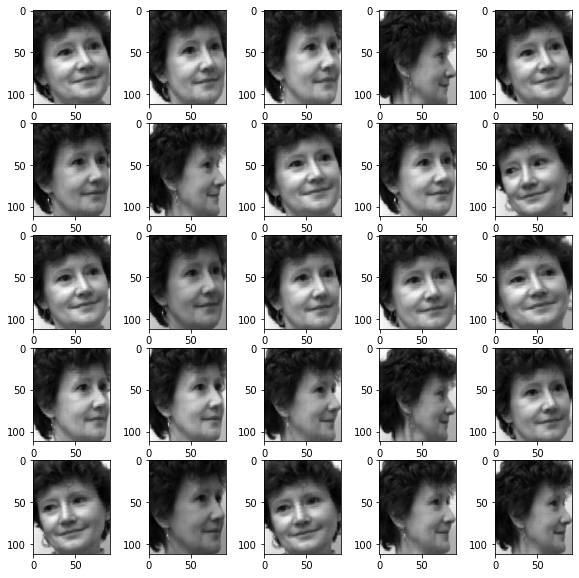

In [8]:
fig, axs = plt.subplots(5, 5,figsize=(10,10))
axs = axs.ravel()
for i in range(25):
    axs[i].imshow(Y[:,:,i], cmap='gray')

In [9]:
X = np.array(np.zeros([33,112,92]))
for i in range(Y.shape[2]):
  X[i] = Y[:,:,i]
X = np.reshape(X,(33,10304))



---


### Q2.2.1 MDS (*)
Explore the MDS-embedding of the 33 faces on top two eigenvectors: order the faces according to the top 1st eigenvector and visualize your results with figures.

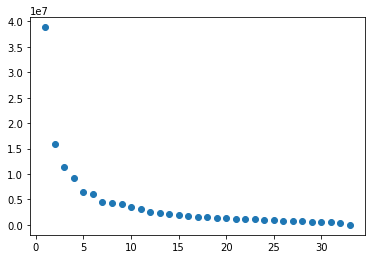

In [10]:
# Q2.2.1 code starts here
def MDS(L,d,figure=False):
  D = L*L
  N = D.shape[1]
  onesN  = ones(N)
  DonesN = dot(D, onesN)
  G2 = array([onesN]).T @ array([DonesN])/N
  G  = -(D-G2-G2.T+sum(DonesN)/N**2)/2
  U,Lambda,Vh = svd(G)
  Z = dot(U[:,:d], diag(sqrt(Lambda[:d])))
  if figure:
    plt.scatter(arange(1,N+1), sqrt(Lambda))
  return Z

L = cal_pairwise_dist_sq(X)
d = 2 
Z = MDS(L,d,5)




---


### Q2.2.2 IsoMap (*)
Explore the ISOMAP-embedding of the 33 faces on the $k = 5$ nearest neighbor graph
and compare it against the MDS results.

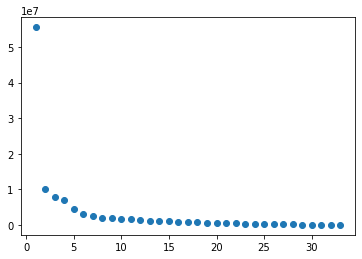

In [11]:
# Q2.2.2 code starts here
Z = IsoMap_knn(L,d,5)


In [12]:
print(argsort(Z[:,0])) 
a = argsort(Z[:,0])
id

[ 9 20 22 14  0 10  7  4 32 13 19 12  1 26 30 11  8  5  2 29 15 16 25 21
 31 17 23  6 24 27 28  3 18]


array([[29, 21, 15,  2, 32, 16,  6, 31, 17, 27, 33, 18, 22, 24, 28, 13,
        12,  8,  1, 23, 26, 10, 25,  7,  5, 11, 20,  4,  3, 14, 19,  9,
        30]], dtype=uint8)

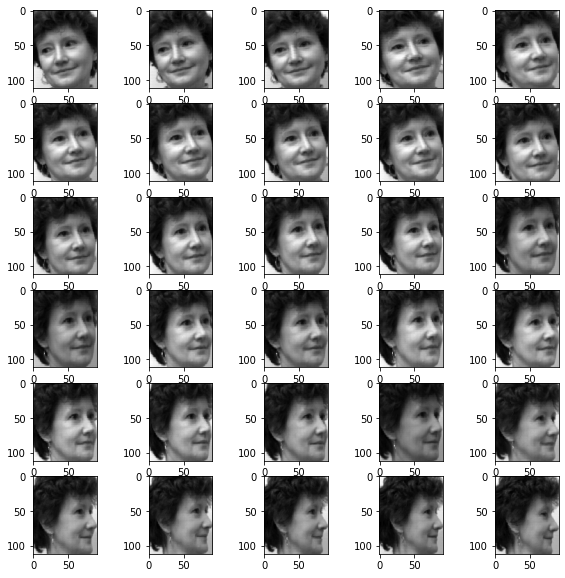

In [13]:
fig, axs = plt. subplots(6, 5, figsize=(10,10))
axs = axs. ravel()
for i in range (30):
  axs[i].imshow(X[a[i],:].reshape(112,92),cmap='gray')



---


# Q3: Gaussian Random Projections and Inner Products (20pt) (***)

In this problem, you will show that inner products are approximately preserved using random projections. Let $f(\m{x})=\frac{1}{\sqrt{d}}\m{x}A$ represent our random projection of the row vector $\m{x}\in \mb{R}^D$, with $A$ a $D\times d$ projection matrix with each entry sampled i.i.d from $\mathcal{N}(0,1)$. 

The corollary of Johnson-Lindenstrauss Lemma is the **norm preservation theorem**. It states that for all $\m{x}\in\mb{R}^D$, the norm of the random projection $f(\m{x})$ approximately maintains the norm of the original $\m{x}$ with probability: 
   $$ \mb{P}\{(1-\epsilon)\|\m{x}\|^2\le \|f(\m{x})\|^2\le (1+\epsilon)\|\m{x}\|^2\}\ge 1- 2\exp(-(\epsilon^2 -\epsilon^3)d/4)$$
where $\epsilon\in (0,1/2)$.


Using the norm preservation theorem, prove that for any $\m{u},\m{v}\in \mb{R}^D$, s.t. $\|\m{u}\|\le 1$ and $\|\m{v}\|\le 1$, 
$$\mb{P}\{ |\m{u}\cdot \m{v} - f(\m{u})\cdot f(\m{v})|\ge \epsilon \}\le 4\exp(-(\epsilon^2-\epsilon^3)d/4 ) $$

Note that $\m{u}\cdot \m{v}$ is the original dot product, and $\phi(\m{u})\cdot \phi(\m{v})$ ) is the dot product for the random
projections. This statement puts a probabilistic bound on the distance between the two dot product. (Hint: Think about using norm preservation theorem with $\m{x}=\m{u}+\m{v}$ and $\m{x}=\m{u}-\m{v}$). 


## Your Answer starts here: 
Applying the theorem we get,
$$ (1-\epsilon)\|\m{u+v}\|^2\le \|f(\m{u+v})\|^2\le (1+\epsilon)\|\m{u+v}\|^2$$
$$ (1-\epsilon)\|\m{u-v}\|^2\le \|f(\m{u-v})\|^2\le (1+\epsilon)\|\m{u-v}\|^2$$ 
Then:
$$4f(u)⋅f(v) = \|f(\m{u+v})\|^2-\|f(\m{u-v})\|^2$$
$$\ge(1-\epsilon)\|\m{u+v}\|^2-(1-\epsilon)\|\m{u-v}\|^2 $$
$$=4u⋅v-2ϵ(\|u\|^2+\|v\|^2)$$
$$≥4u⋅v-4ϵ$$



---


# Q4: Sparse random projection (20pt) (**)
In class, we implement `sparse_proj` but we didn't use the sparsity of the matrix. In fact, the output `R` is still a full matrix. So in the class demo, we cannot use $d=10000$ since the full matrix runs out of the memory. 

In this problem, you are going to use `scipy` sparse matrix package to generate this sparse random projection matrix: https://docs.scipy.org/doc/scipy/reference/sparse.html. Particularly, you can use `csc_matrix`. 

Please implement sparse random projection and test with the class example at $d=10000$. 

**Warning:** you cannot use the class demo function and turn the output into sparse matrix. Because the out of memory issue still exists when you constructing `R`.  

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized().data[:500]

In [ ]:
def cal_pairwise_dist_sq(X):
  sum_x = sum(X.power(2),1)
  dist_matrix_sq = (-2 * dot(X, X.T).toarray()+ sum_x).T + sum_x
  return array(dist_matrix_sq)

def cal_pairwise_proj_dist_sq(X):
  sum_x = sum(np.power(X,2),1)
  dist_matrix_sq = (-2 * dot(X, X.T)+ sum_x).T + sum_x
  return dist_matrix_sq

In [ ]:
from scipy.sparse.csc import csc_matrix

def sparse_proj1(s, D, d):
  c = []
  r = []
  da = []
  val = sqrt(s/d)
  for a in range(d):
    R1 = np.random.rand(1,D)      #creates a row of random values 
    R = np.argwhere(R1>1-1/(2*s)) #returns which columns satisfy the argument
    C = np.argwhere(R1<1/(2*s))   #returns which columns satisfy the argument

    colum = np.concatenate([R[:,1],C[:,1]]) #combines the row values in order of val then -val
    c.extend(colum)
    #rw = np.concatenate((R[:,0],C[:,0]))    #array pf zeros for zero row of combined length of R and C
    rw = np.full((colum.shape[0]),a)
    r.extend(rw)

    datar = np.full((R.shape[0]),val)       
    datac = np.full((C.shape[0]),-val)
    data = np.concatenate((datar,datac))      #creates array of data in order of R(val) C(-val)
    da.extend(data)
    
  out = csc_matrix((da,(r,c)),shape=(d,D))
  return out.T

In [ ]:
def cal_pairwise_proj_dist_sq(X):
  sum_x = sum(np.power(X,2),1)
  dist_matrix_sq = (-2 * dot(X, X.T)+ sum_x).T + sum_x
  return dist_matrix_sq

In [ ]:
N, D = data.shape
d_range = np.array([500, 10000])  
dist_matrix_sq = cal_pairwise_dist_sq(data).ravel()
# select only non-identical samples pairs
nonzero = dist_matrix_sq != 0
dist_matrix_sq = dist_matrix_sq[nonzero]

In [ ]:

from time import time

s   = 400
for d in d_range:
  t0 = time()
  R=sparse_proj1(s, D, d)
  #R=gaussian_proj(D,d)
  projected_data = data.dot(R)
  print(f"Projected {N} samples from {D} to {d} in {time() - t0}s")
  proj_dist_matrix_sq = cal_pairwise_proj_dist_sq(projected_data.toarray()).ravel()
  proj_dist_matrix_sq = proj_dist_matrix_sq[nonzero]

  plt.figure()
  plt.hexbin(
          dist_matrix_sq,
          proj_dist_matrix_sq,
          gridsize=100,
          cmap=plt.cm.PuBu,
          extent=[0, 3.0, 0, 3.0],
  )
  plt.xlabel("Pairwise squared distances in original space")
  plt.ylabel("Pairwise squared distances in projected space")
  plt.title(f"Pairwise distances distribution for d={d}" )
  cb = plt.colorbar()
  cb.set_label("Sample pairs counts")

  rates = proj_dist_matrix_sq / dist_matrix_sq
  print(f"Mean distances rate: {mean(rates)} ({std(rates)})" )
  
